# <center>Data Mining Project</center>

<center>
Master in Data Science and Advanced Analytics <br>
NOVA Information Management School
</center>

** **
## <center>*ABCDEats Inc*</center>

<center>
Group 19 <br>
Jan-Louis Schneider, 20240506  <br>
Marta Boavida, 20240519  <br>
Matilde Miguel, 20240549  <br>
Sofia Gomes, 20240848  <br>
</center>

** **

## <span style="color:salmon"> Notebook </span> 

In this notebook, we use some techniques to decide for a final clustering approach and conduct this clustering.


## <span style="color:salmon"> Table of Contents </span>

<a class="anchor" id="top"></a>

1. [Import Libraries](#one-bullet) <br>

2. [Import Datasets](#two-bullet) <br>

3. [Feature Selection](#three-bullet) <br>

4. [Hierachial Clustering](#four-bullet) <br>

5. [K-Means Clustering](#five-bullet) <br>

6. [Perspective based Clustering](#six-bullet) <br>

7. [Final Clustering](#seven-bullet) <br>

8. [Marketing approaches](#eight-bullet) <br> 


<a class="anchor" id="one-bullet"></a>
## <span style="color:salmon"> 1. Import Libraries </span>
<a href="#top">Top &#129033;</a>

In [4]:
import pandas as pd 
import numpy as np
import scipy

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from scipy.stats import chi2_contingency
import scipy.stats as stats
import warnings

from math import ceil
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.decomposition import PCA
from collections import Counter

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import pdist, squareform
from sklearn.feature_selection import VarianceThreshold
import plotly.express as px
import joblib

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)





sns.set()

<a class="anchor" id="two-bullet"></a>
## <span style="color:salmon"> 2. Import Datasets </span> 
<a href="#top">Top &#129033;</a>

In [3]:
df = pd.read_csv("../dataset/df_transform.csv")

In [4]:
df.head(5)

,customer_region,vendor_count,product_count,is_chain,first_order,last_order,lifetime_days,preferred_order_days,preferred_part_of_day,total_expenses,avg_per_product,avg_per_order,avg_order_size,culinary_variety,chain_preference,loyalty_to_venders,customer_age_group,last_promo_DISCOUNT,last_promo_FREEBIE,payment_method_CASH,payment_method_DIGI
0,2360.0,-0.268272,0.770472,-0.875898,-3.190912,-2.554213,-1.221305,"['DOW_6', 'DOW_0']",['18h-00h'],0.219535,-0.247962,0.836736,2.839373,-0.910966,-0.186732,0.669419,-1.313846,0.0,0.0,0.0,1.0
1,8670.0,-0.268272,-0.268272,-0.268272,-3.190912,-2.554213,-1.221305,"['DOW_6', 'DOW_0']",['06h-12h'],-0.216113,0.668754,0.216075,-0.802304,-0.132847,0.902339,0.669419,-3.018849,1.0,0.0,0.0,1.0
2,4660.0,-0.875898,-0.268272,-0.268272,-3.190912,-2.554213,-1.221305,"['DOW_6', 'DOW_0']",['06h-12h'],-0.977961,-0.638071,-0.839011,-0.802304,-0.910966,0.902339,-1.505379,1.600876,1.0,0.0,1.0,0.0
3,4660.0,-0.268272,0.162846,-0.875898,-3.190912,-2.181768,-0.980332,"['DOW_1', 'DOW_6']","['06h-12h', '12h-18h']",0.315236,0.838122,0.974250,0.649793,-0.132847,-0.186732,0.669419,-0.104127,0.0,0.0,0.0,1.0
4,4660.0,-0.268272,0.770472,-1.914641,-3.190912,-2.181768,-0.980332,"['DOW_1', 'DOW_6']",['06h-12h'],0.928126,0.936618,1.862202,2.839373,-0.132847,-1.721691,0.669419,-1.313846,0.0,0.0,0.0,1.0


In [5]:
df.columns

Index(['customer_region', 'vendor_count', 'product_count', 'is_chain',
       'first_order', 'last_order', 'lifetime_days', 'preferred_order_days',
       'preferred_part_of_day', 'total_expenses', 'avg_per_product',
       'avg_per_order', 'avg_order_size', 'culinary_variety',
       'chain_preference', 'loyalty_to_venders', 'customer_age_group',
       'last_promo_DISCOUNT', 'last_promo_FREEBIE', 'payment_method_CASH',
       'payment_method_DIGI'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31236 entries, 0 to 31235
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   customer_region        31236 non-null  float64
 1   vendor_count           31236 non-null  float64
 2   product_count          31236 non-null  float64
 3   is_chain               31236 non-null  float64
 4   first_order            31236 non-null  float64
 5   last_order             31236 non-null  float64
 6   lifetime_days          31236 non-null  float64
 7   preferred_order_days   31236 non-null  object 
 8   preferred_part_of_day  31236 non-null  object 
 9   total_expenses         31236 non-null  float64
 10  avg_per_product        31236 non-null  float64
 11  avg_per_order          31236 non-null  float64
 12  avg_order_size         31236 non-null  float64
 13  culinary_variety       31236 non-null  float64
 14  chain_preference       31236 non-null  float64
 15  lo

<a class="anchor" id="three-bullet"></a>
## <span style="color:salmon"> 3. Feature Selection </span> 
<a href="#top">Top &#129033;</a>

Even though customer_region and the features created by one-hot-encoding are technically numerical features, we will not consider them for the clustering. customer_region is a nominal feature, so without a natural order of importance. The features created by one-hot-encoding are also not considered for the clustering because using these leads to multiple possible issues, especially disproportionatal influence on the clustering by these features: 

In [7]:
nonmetric_features = ['customer_region', 'preferred_order_days', 'preferred_part_of_day', 'last_promo_DISCOUNT', 'last_promo_FREEBIE', 'payment_method_CASH', 'payment_method_DIGI']

In [8]:
metric_features = [col for col in df.columns if col not in nonmetric_features]

In [9]:
metric_features

['vendor_count',
 'product_count',
 'is_chain',
 'first_order',
 'last_order',
 'lifetime_days',
 'total_expenses',
 'avg_per_product',
 'avg_per_order',
 'avg_order_size',
 'culinary_variety',
 'chain_preference',
 'loyalty_to_venders',
 'customer_age_group']

<a class="anchor" id="four-bullet"></a>
## <span style="color:salmon"> 4. Hierachial Clustering </span> 
<a href="#top">Top &#129033;</a>

1. Best number of clusters


Goal: find the best number of clusters for this data

In [10]:
#functions for ss (sum of squares), ssb (sum of squares between groups), ssw (sum of squares within groups)
# needed for later calculation of rsquared

def get_ss(df, feats):
    df_ = df[feats]
    ss = np.sum(df_.var() * (df_.count() - 1))
    return ss 


def get_ssb(df, feats, label_col):
    ssb_i = 0
    for i in np.unique(df[label_col]):
        df_ = df.loc[:, feats]
        X_ = df_.values
        X_k = df_.loc[df[label_col] == i].values
        ssb_i += (X_k.shape[0] * (np.square(X_k.mean(axis=0) - X_.mean(axis=0))) ) 
    ssb = np.sum(ssb_i)
    return ssb


def get_ssw(df, feats, label_col):
    feats_label = feats+[label_col]
    df_k = df[feats_label].groupby(by=label_col).apply(lambda col: get_ss(col, feats), include_groups=False)
    return df_k.sum()



In [11]:
# function to get rsquared for one cluster using previously defined methods
def get_rsq(df, feats, label_col):
    df_sst_ = get_ss(df, feats)             
    df_ssw_ = get_ssw(df, feats, label_col)     
    df_ssb_ = df_sst_ - df_ssw_                 
    
    return (df_ssb_/df_sst_)  # r2 = ssb/sst 
    

In [12]:
# function to get rsquares for multiple clusters
def get_r2_hc(df, link_method, max_nclus, min_nclus=1, dist="euclidean"):
    r2 = []
    feats = df.columns.tolist()
    
    for i in range(min_nclus, max_nclus+1):
        cluster = AgglomerativeClustering(n_clusters=i, metric=dist, linkage=link_method)
        
        hclabels = cluster.fit_predict(df) 
        
        df_concat = pd.concat([df, pd.Series(hclabels, name='labels', index=df.index)], axis=1)  
        
        r2.append(get_rsq(df_concat, feats, 'labels'))
        
    return np.array(r2)


In [41]:
##########################################
# THIS TAKES A FEW MINUTES TO RUN!!
##########################################

hc_methods = ["ward", "complete", "average", "single"]
max_nclus = 10

r2_hc = np.vstack([ get_r2_hc(df[metric_features], 
                              link, 
                              max_nclus=max_nclus, 
                              min_nclus=1, 
                              dist="euclidean") 
                              for link in hc_methods])

In [42]:
r2_hc_methods = pd.DataFrame(r2_hc.T, index=range(1, max_nclus + 1), columns=hc_methods)

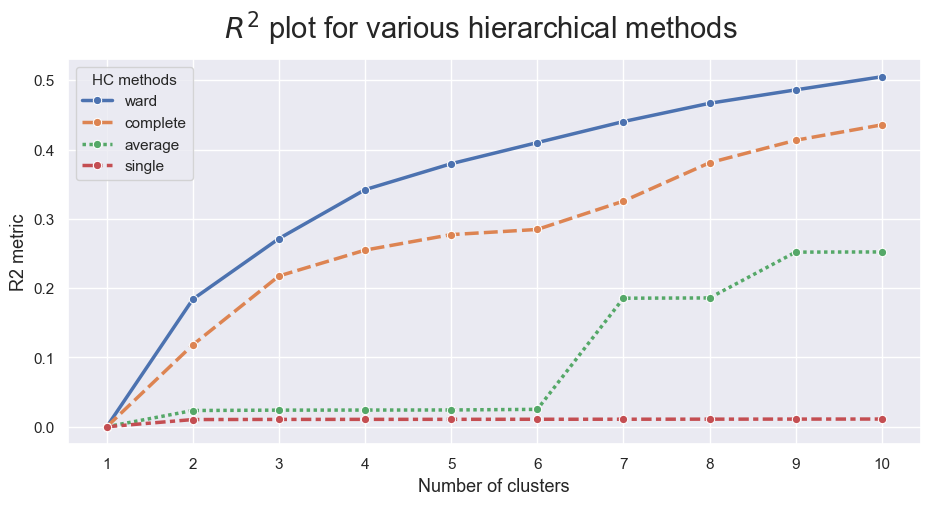

In [43]:
# plot the R2 for multiple cluster numbers
sns.set()

fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, markers=["o"]*4)

plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

fig.suptitle("$R^2$ plot for various hierarchical methods", fontsize=21)

plt.show()

**Conclusion:** Best number of clusters seems to be 4 or 5 or 6 clusters, best linkage = ward

2. Perform Clustering with 6 clusters


Goal: evaluate the results of clustering with 6 clusters

In [13]:
hclust6 = AgglomerativeClustering(linkage='ward', metric='euclidean', n_clusters=6)
hc_labels6 = hclust6.fit_predict(df[metric_features])
hc_labels6

array([0, 3, 4, ..., 2, 0, 0], dtype=int64)

In [ ]:
joblib.dump(hclust6, 'FINAL_clusters_hc6.pkl')   # export the clustering for possible later use, in the interface

np.savetxt("FINAL_hc_labels6.csv", hc_labels6, delimiter=",", fmt='%d')  # export the lables resulted by clustering

In [14]:
# add labels to dataset
labels_series = pd.Series(hc_labels6, name='labels', index=df.index)

df_concat6 = pd.concat([df[metric_features], labels_series],axis=1)
df_concat6[metric_features+['labels']].groupby('labels').mean()

,vendor_count,product_count,is_chain,first_order,last_order,lifetime_days,total_expenses,avg_per_product,avg_per_order,avg_order_size,culinary_variety,chain_preference,loyalty_to_venders,customer_age_group
labels,,,,,,,,,,,,,,
0,-0.690731,-0.359152,-1.676978,0.001299,0.214642,-1.178818,-0.355791,0.659289,0.749297,0.554866,-0.754490,-1.130083,0.647036,-0.004530
1,0.943143,1.705005,0.863879,-1.400487,0.784685,0.825322,0.916827,-0.320346,-0.188847,0.173562,1.306032,0.314997,-0.308135,0.139177
2,-0.920481,-0.920481,-0.895770,0.062473,0.065259,-1.621179,-1.380870,0.035473,-0.284290,-0.778959,-0.947593,0.876155,0.669419,-0.020179
3,-0.057009,0.437828,-0.292965,-0.364162,0.591005,0.322248,0.219363,0.285477,0.251522,0.043632,-0.104146,0.215492,0.039628,-0.071719
4,-0.066122,0.204749,0.006367,-0.457302,0.541204,0.300427,-0.924986,-1.236298,-1.227573,-0.553937,0.006188,0.722719,0.098829,-0.019644
5,-0.280320,0.812288,-1.444545,-0.654290,0.684262,0.506719,0.446140,0.119667,0.092172,-0.031305,-0.358331,-1.417032,-1.590873,-0.027677


3. Perform Clustering with 5 clusters


Goal: evaluate the results of clustering with 5 clusters

In [15]:
hclust5 = AgglomerativeClustering(linkage='ward', metric='euclidean', n_clusters=5)
hc_labels5 = hclust5.fit_predict(df[metric_features])
hc_labels5

array([1, 0, 4, ..., 2, 1, 1], dtype=int64)

In [ ]:
joblib.dump(hclust5, 'FINAL_clusters_hc5.pkl')

np.savetxt("FINAL_hc_labels5.csv", hc_labels5, delimiter=",", fmt='%d')

In [16]:
labels_series = pd.Series(hc_labels5, name='labels', index=df.index) 

df_concat5 = pd.concat([df[metric_features], labels_series],axis=1)
df_concat5[metric_features+['labels']].groupby('labels').mean()

,vendor_count,product_count,is_chain,first_order,last_order,lifetime_days,total_expenses,avg_per_product,avg_per_order,avg_order_size,culinary_variety,chain_preference,loyalty_to_venders,customer_age_group
labels,,,,,,,,,,,,,,
0,-0.103449,0.515701,-0.532447,-0.424497,0.610399,0.360610,0.266523,0.250995,0.218383,0.028048,-0.157006,-0.124007,-0.299450,-0.062560
1,-0.690731,-0.359152,-1.676978,0.001299,0.214642,-1.178818,-0.355791,0.659289,0.749297,0.554866,-0.754490,-1.130083,0.647036,-0.004530
2,-0.920481,-0.920481,-0.895770,0.062473,0.065259,-1.621179,-1.380870,0.035473,-0.284290,-0.778959,-0.947593,0.876155,0.669419,-0.020179
3,0.943143,1.705005,0.863879,-1.400487,0.784685,0.825322,0.916827,-0.320346,-0.188847,0.173562,1.306032,0.314997,-0.308135,0.139177
4,-0.066122,0.204749,0.006367,-0.457302,0.541204,0.300427,-0.924986,-1.236298,-1.227573,-0.553937,0.006188,0.722719,0.098829,-0.019644


Performing clustering with 4 clusters not necessary, as explained later

4. Analyse clusters


Goal: analyse the clusters of clustering with 6 clusters

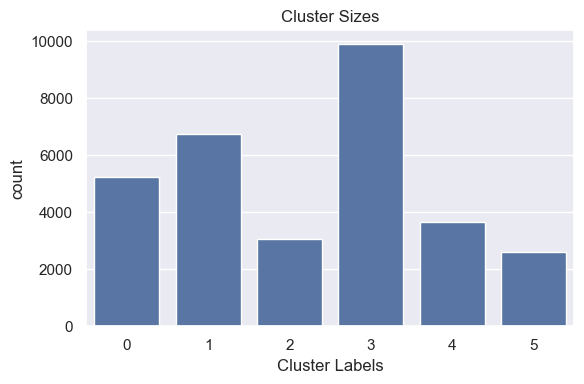

In [17]:
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(data=df_concat6, x='labels')
ax.set_title("Cluster Sizes")
ax.set_xlabel("Cluster Labels")
fig.tight_layout()
plt.show()

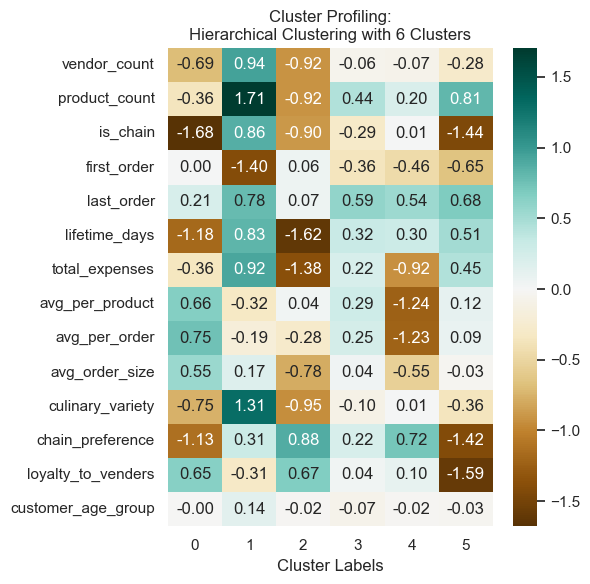

In [18]:
fig, ax = plt.subplots(figsize=(6, 6))
hc_profile = df_concat6.groupby('labels').mean().T
sns.heatmap(hc_profile,center=0, annot=True, cmap="BrBG", fmt=".2f",ax=ax)
ax.set_xlabel("Cluster Labels")
ax.set_title("Cluster Profiling:\nHierarchical Clustering with 6 Clusters")
fig.tight_layout()
plt.show()

For 6 clusters, we see the cluster **3** has the biggest amount of data, followed by  **1** and **0**. The clusters **2**, **4** and **5** have the least amount of data. We can conclude that clusters most likely the customers in cluster **3** represent the regular customer, who do not have a lot of outstanding attributes and always have average values close to the mean, whilst **2**, **4** and **5** might represent a smaller and more specific group of customers or a subgroup of one of the bigger cluster groups. 

customers in cluster **1** have the very high values in vendor_count, product_count, total_expenses, so they represent the customers who make the most orders. They also have low first_order value and high lifetime, so they first placed orders a long time ago and stayed with us for a long time/still place orders. They are our **best** and **most valuable** customers. They also show high values in is_chain and culinary_variety, whilst having low values in loyality, meaning they order from a lot of different restaurants also in different types of food, especially prefering chains. Although not a big difference, customers in cluster **1** also tend to be a bit older, explained by the higher average value in customer_age_group.

customers in cluster **2** represent the counter part for the customers in cluster **1**, they have very low value for lifetime_days so they did not spend a lot of time using ABCDEATS, and also in this time they did not place a lot of orders and did not spend a lot of money. They represent our **"worst" customers**.

customers in clusters **4** and **3** represent the **regular  customers**, they are similar. But customers in cluster **4** have lower values in total expenses and average order sizes and averages per order and product, whilst having higher values in chain preference. So they can be seen as the standard customers who tend to **spend less**, whilst the customers from cluster **3** can be seen as the regular customers who use the ABCDEATS **more frequently**. 

customers in cluster **5** can be seen as a smaller subgroup from the cluster **3**, but with lower values in chain_preference, is_chain and loyality, meaning that these customers **avoid using chains**.

customers in cluster **0** have low vendor_count and Product_count, but they have high values in avearge_per_product, avg_per_order and avg_order_size, meaning they **dont make a lot of orders, but when they do they make big orders**.

5. Analyse clusters


Goal: analyse the clusters of clustering with 5 clusters

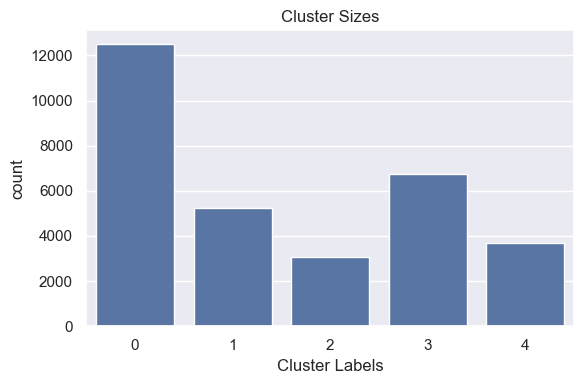

In [19]:
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(data=df_concat5, x='labels')
ax.set_title("Cluster Sizes")
ax.set_xlabel("Cluster Labels")
fig.tight_layout()
plt.show()

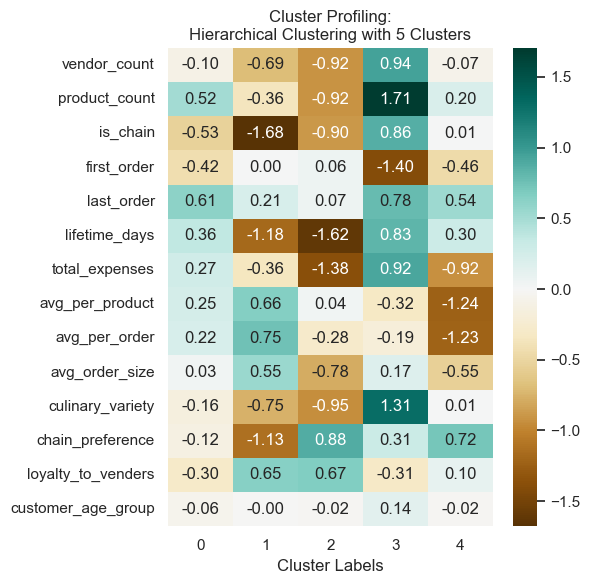

In [20]:
fig, ax = plt.subplots(figsize=(6, 6))
hc_profile = df_concat5.groupby('labels').mean().T
sns.heatmap(hc_profile,center=0, annot=True, cmap="BrBG", fmt=".2f",ax=ax)
ax.set_xlabel("Cluster Labels")
ax.set_title("Cluster Profiling:\nHierarchical Clustering with 5 Clusters")
fig.tight_layout()
plt.show()

For 5 clusters we can see that four of them are exactly equal to ones from the 6 Clustering (**2** from 5 is equal to **2** from 6, 
**4** is equal to **4**, **3** equal to **1** and **1** equal to **0**). The cluster **0** from the 5-clustering divides itself in the clusters **3** and **5** from the 
6-clustering as only difference between the two. So the difference between these approaches are the regular customers who order more frequently but avoid using chains being seperated into an own cluster.

6. Final decision


Goal: state final decision for best number of clusters

In our opinion, the seperation of the regular customers who avoid chains into an own cluster can be useful and makes sense,
especially considering customer-specific advertisments, in which in this case these users could receive different, non-chain-related,
advertisments. Thats why we prefer the clustering with 6 clusters over the one with 5 clusters. A deeper analysis of the one with 4 clusters does
not make sense at this point since we already prefer the one with 6 over the one with 5, and with 4 clusters our data would potentially be 
generalized too much.
So finally we decide for the best **number of clusters being 6**

<a class="anchor" id="five-bullet"></a>
## <span style="color:salmon"> 5. K-Means Clustering </span> 
<a href="#top">Top &#129033;</a>

1. best number of clusters


Goal: find the best number of clusters for K-Means clustering

In [ ]:
range_clusters = range(1, 11)

In [ ]:
inertia = []
for n_clus in range_clusters:
    kmclust = KMeans(n_clusters=n_clus, init='k-means++', n_init=15, random_state=1)
    kmclust.fit(df[metric_features])
    inertia.append(kmclust.inertia_)

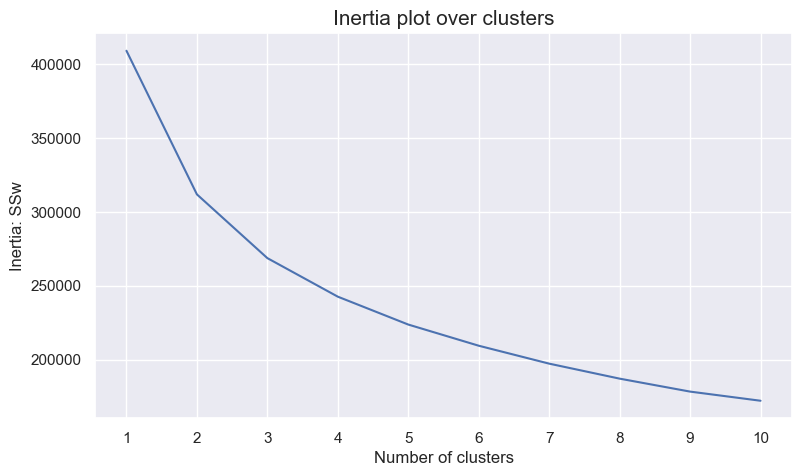

In [26]:
fig, ax = plt.subplots(figsize=(9,5))

ax.plot(range_clusters, inertia)
ax.set_xticks(range_clusters)
ax.set_ylabel("Inertia: SSw")
ax.set_xlabel("Number of clusters")
ax.set_title("Inertia plot over clusters", size=15)

plt.show()

**Conclusion:** We see that best value should be between 2, 3 or 4

Using Silhouette plot for more insights before decision:

For n_clusters = 2, the average silhouette_score is : 0.20611998609367602
For n_clusters = 3, the average silhouette_score is : 0.17858636312082246
For n_clusters = 4, the average silhouette_score is : 0.1664138177482296
For n_clusters = 5, the average silhouette_score is : 0.1691009196230673
For n_clusters = 6, the average silhouette_score is : 0.17409847953144109
For n_clusters = 7, the average silhouette_score is : 0.16697795728073397
For n_clusters = 8, the average silhouette_score is : 0.16033730424387704
For n_clusters = 9, the average silhouette_score is : 0.16393590789764464
For n_clusters = 10, the average silhouette_score is : 0.16006817140459648


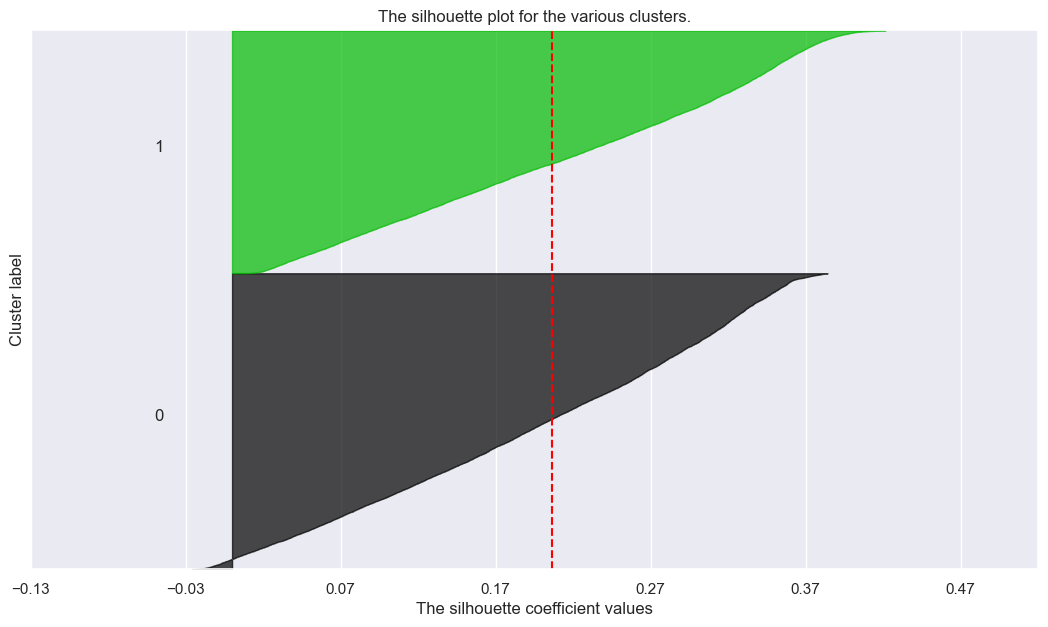

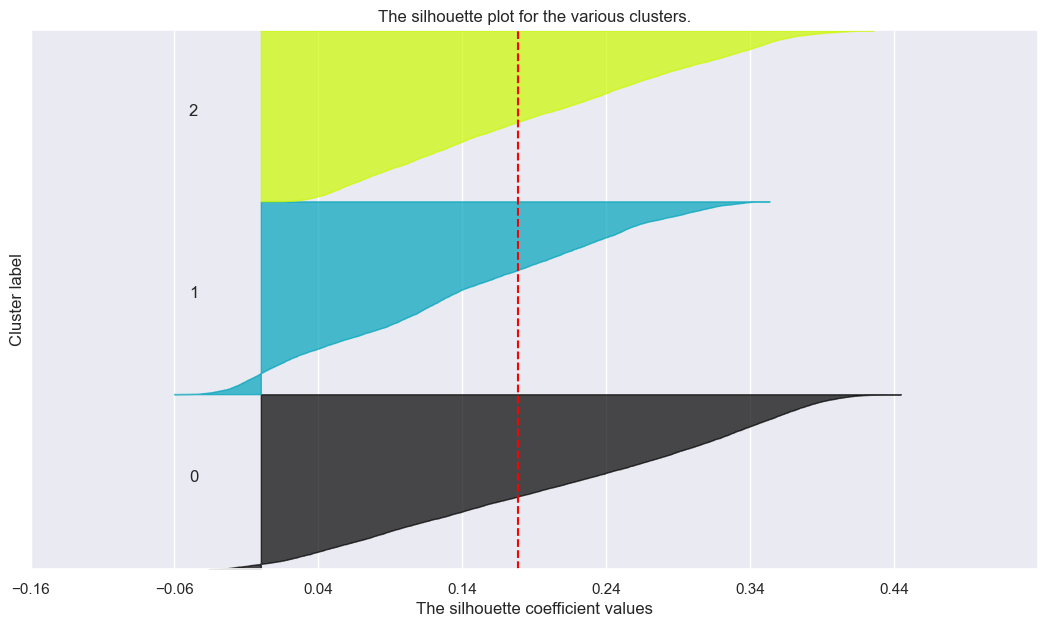

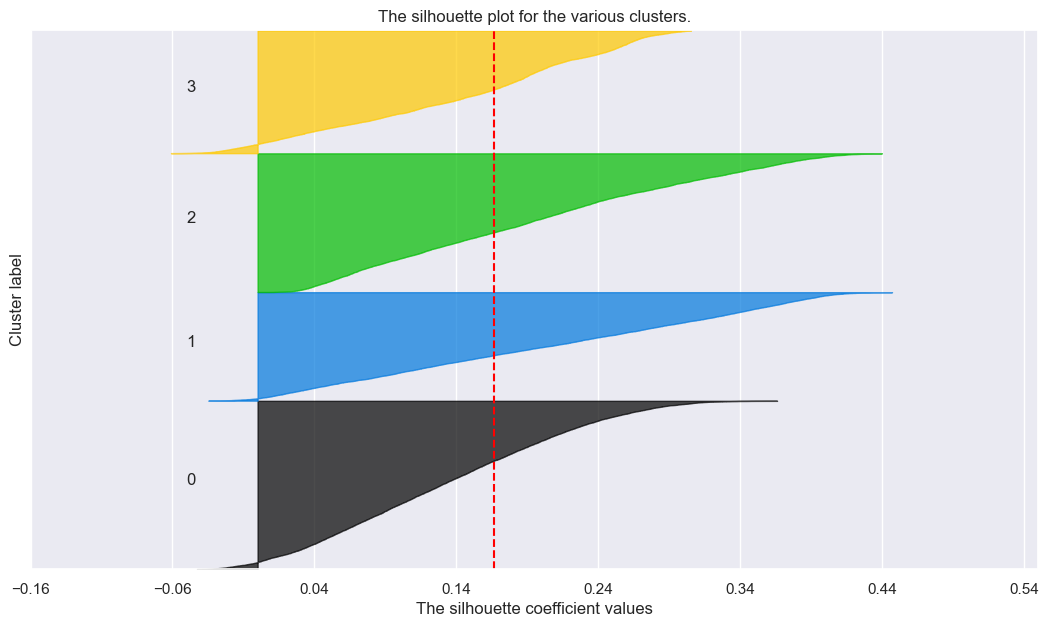

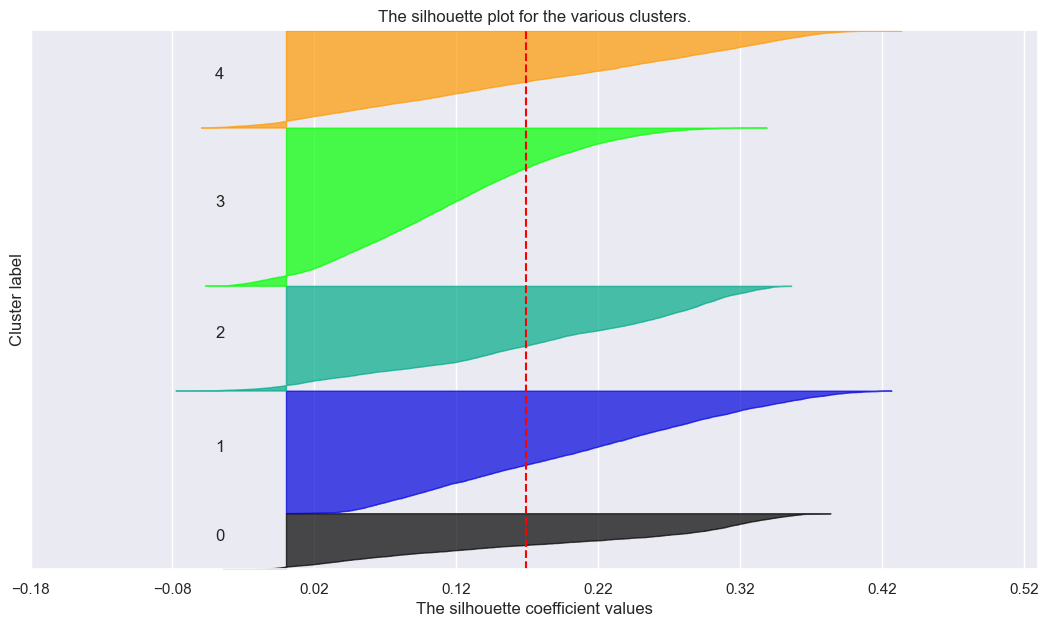

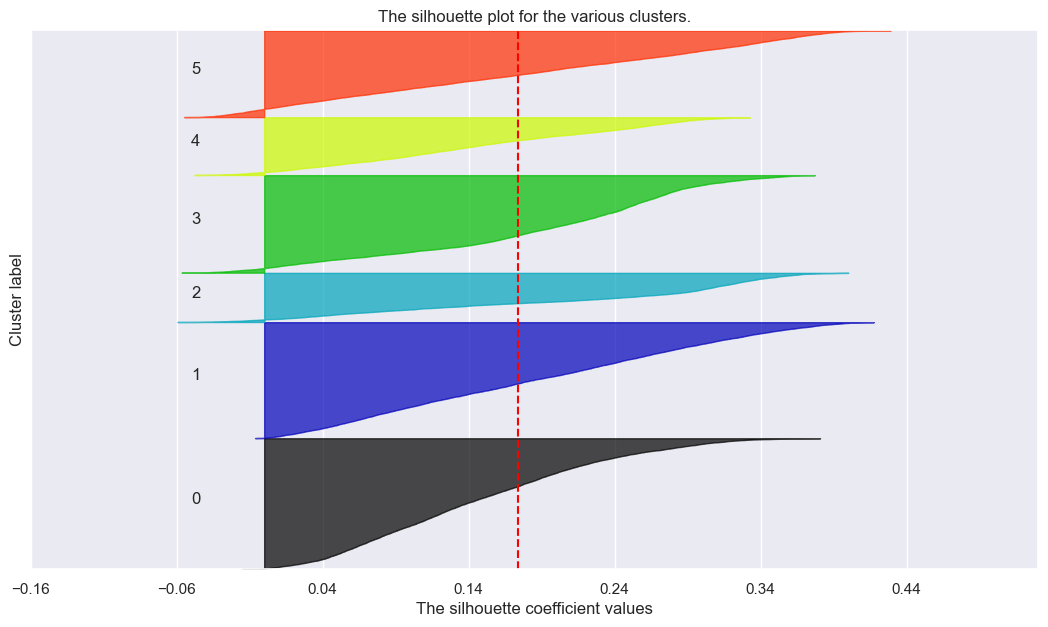

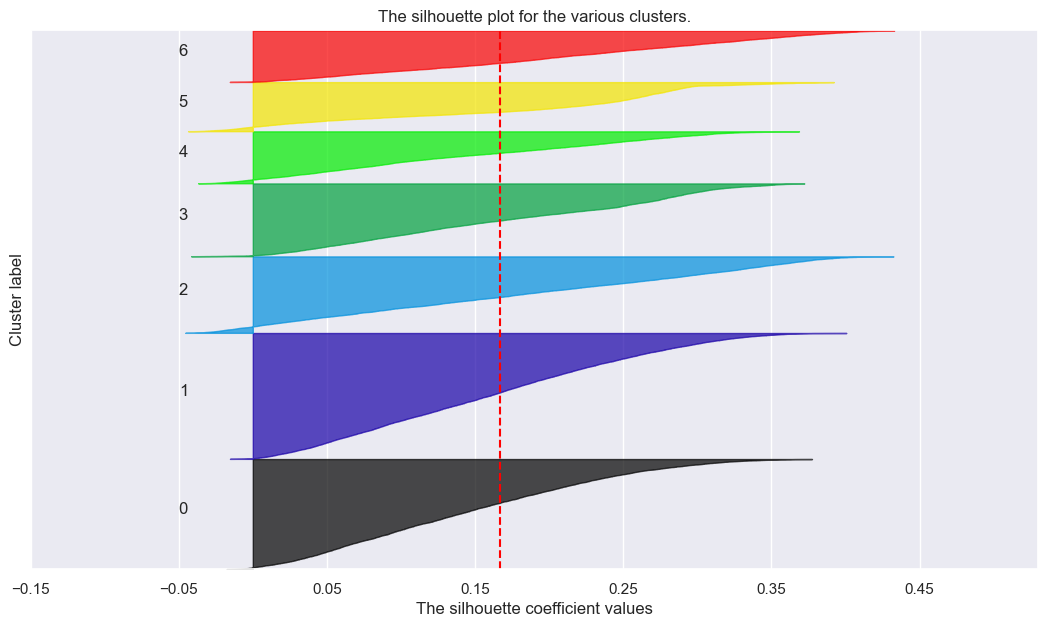

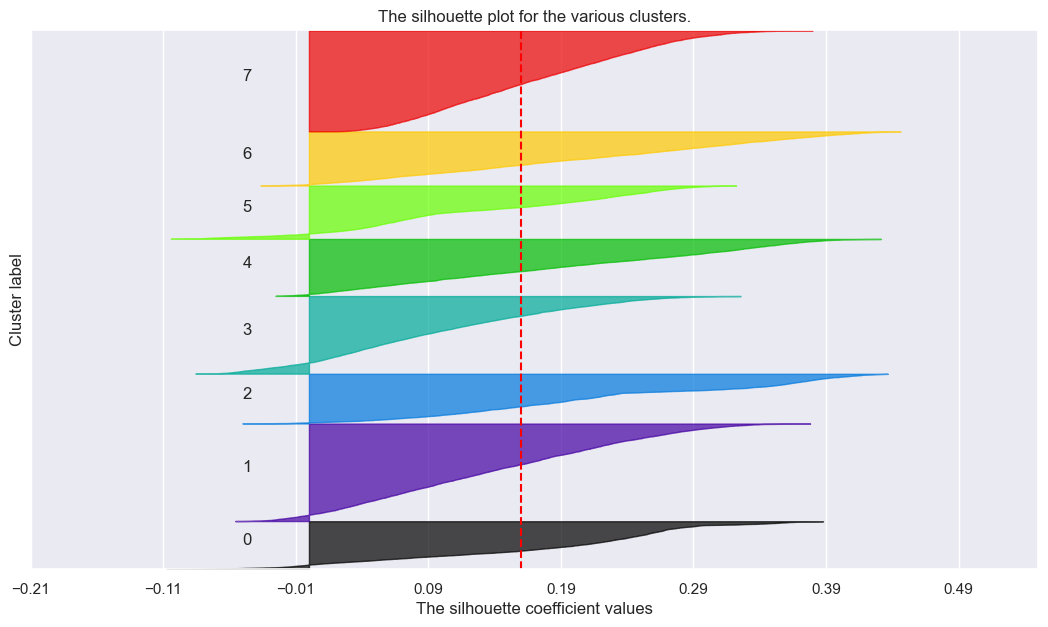

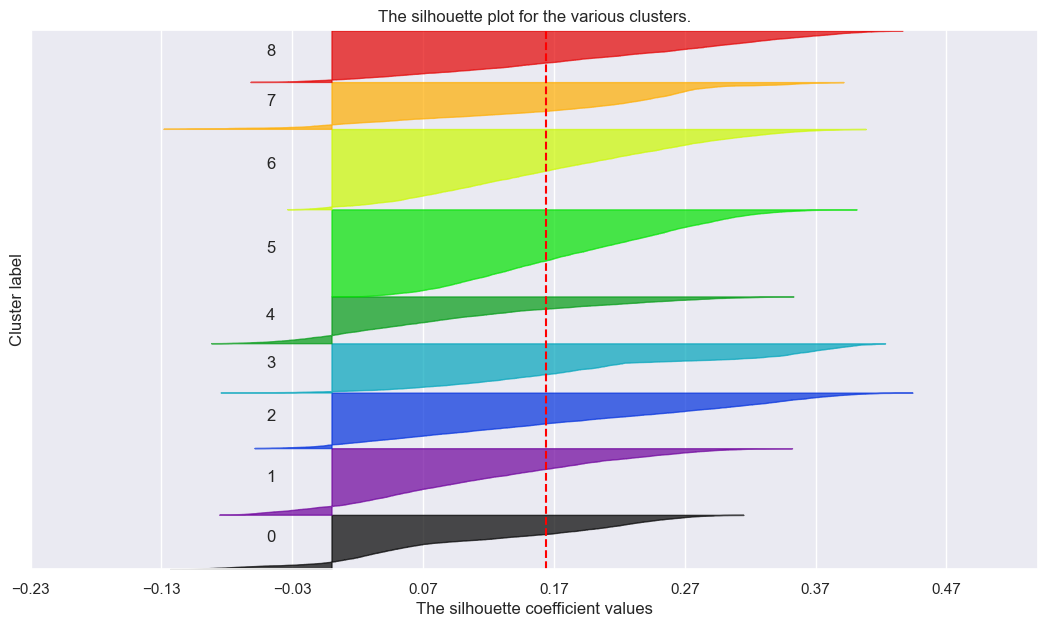

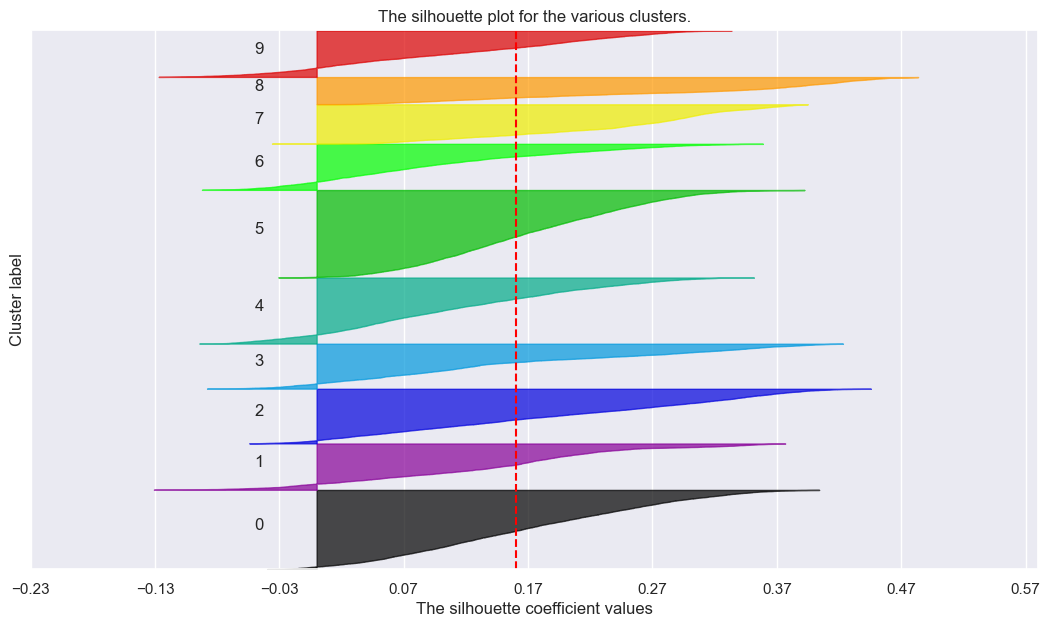

In [27]:
avg_silhouette = []
for nclus in range_clusters:
    if nclus == 1:
        continue
    fig = plt.figure(figsize=(13, 7))

    kmclust = KMeans(n_clusters=nclus, init='k-means++', n_init=15, random_state=1)
    cluster_labels = kmclust.fit_predict(df[metric_features])

    silhouette_avg = silhouette_score(df[metric_features], cluster_labels)
    avg_silhouette.append(silhouette_avg)
    print(f"For n_clusters = {nclus}, the average silhouette_score is : {silhouette_avg}")

    sample_silhouette_values = silhouette_samples(df[metric_features], cluster_labels)

    y_lower = 10
    for i in range(nclus):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        
        color = cm.nipy_spectral(float(i) / nclus)
        plt.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10  # 10 for the 0 samples

    plt.title("The silhouette plot for the various clusters.")
    plt.xlabel("The silhouette coefficient values")
    plt.ylabel("Cluster label")

    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    
    xmin, xmax = np.round(sample_silhouette_values.min() -0.1, 2), np.round(sample_silhouette_values.max() + 0.1, 2)
    plt.xlim([xmin, xmax])
    
    plt.ylim([0, len(df[metric_features]) + (nclus + 1) * 10])

    plt.yticks([])  # Clear the yaxis labels / ticks
    plt.xticks(np.arange(xmin, xmax, 0.1))

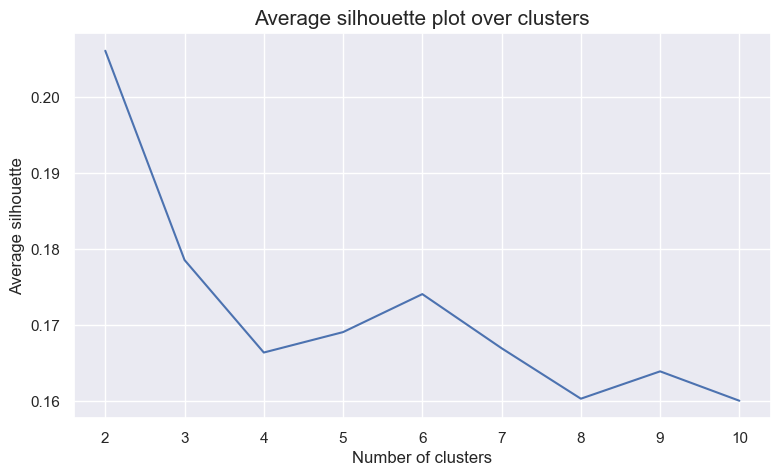

In [28]:
plt.figure(figsize=(9,5))


plt.plot(range_clusters[1:],
         avg_silhouette)

plt.ylabel("Average silhouette")
plt.xlabel("Number of clusters")
plt.title("Average silhouette plot over clusters", size=15)
plt.show()

Following the silhouette plots, the values 2 and 3 look best for number of clusters. 4 looks equally divided, but with quite low Silhouette values

The Average Silhouette plot confirms these observations

2. decision for best number of clusters


Goal: decide for the best number of clusters for K-Means approach

Even though the value 4 might not be the best choice statistically, one of the main objectives of our clustering is the possible extraction of business ideas for certain groups of customers, and in our opinion dividing the customers in only 3 groups is not enough. So we decide for the value 4 as the number of clusters used, since higher values have even worse results in kmeans clustering, and lower values dont offer enough differenciation between customers. 

In [21]:
kmclust4 = KMeans(n_clusters=4, init='k-means++', n_init=15, random_state=1)
kmclust4.fit(df[metric_features])

KMeans(n_clusters=4, n_init=15, random_state=1)

In [22]:
kmclabels4 = kmclust4.predict(df[metric_features])

In [23]:
df_concat4 = pd.concat((df[metric_features], pd.Series(kmclabels4, name='labels', index=df.index)), axis=1)
df_concat4.groupby('labels').mean()

,vendor_count,product_count,is_chain,first_order,last_order,lifetime_days,total_expenses,avg_per_product,avg_per_order,avg_order_size,culinary_variety,chain_preference,loyalty_to_venders,customer_age_group
labels,,,,,,,,,,,,,,
0,-0.024657,0.619908,-0.767496,-0.534155,0.649321,0.496750,0.555951,0.569337,0.579647,0.266785,-0.114888,-0.456008,-0.168983,0.012599
1,0.972233,1.829716,1.040284,-1.420587,0.803134,0.850986,0.928062,-0.470998,-0.358566,0.065478,1.396755,0.365214,-0.590108,0.027762
2,-0.219202,0.053604,-0.242184,-0.358978,0.481438,0.050284,-0.900811,-0.969041,-1.003707,-0.531540,-0.198293,0.574576,0.113314,-0.022857
3,-0.806272,-0.565052,-1.327461,0.114685,0.134750,-1.489935,-0.564630,0.730560,0.656227,0.176928,-0.852863,-0.346760,0.625170,-0.015985


3. analyse the clusters


Goal: evaluate the clustering approach

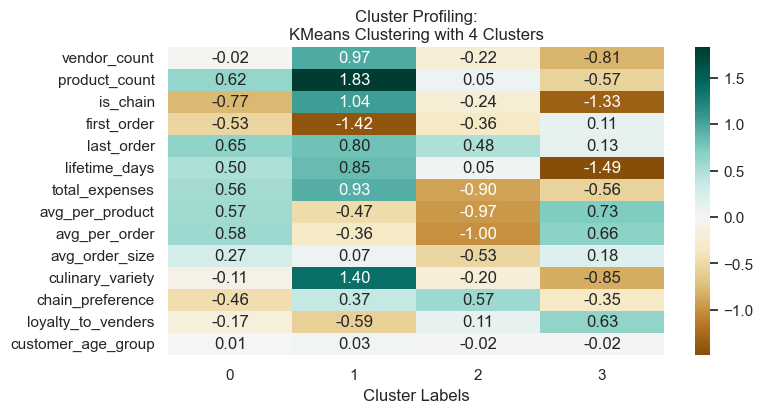

In [24]:
fig, ax = plt.subplots(figsize=(8,4))

km_profile = df_concat4.groupby('labels').mean().T

sns.heatmap(km_profile,
            center=0, annot=True, cmap="BrBG", fmt=".2f",
            ax=ax 
            )

ax.set_xlabel("Cluster Labels")
ax.set_title("Cluster Profiling:\nKMeans Clustering with 4 Clusters")
plt.show()

Create crosstab to compare the clusters from Hiearachial clustering and Kmeans:

In [25]:
# Create crosstab between km_labels and pc_km_labels

pd.crosstab(
    pd.Series(hc_labels6, name='HC6', index=df.index),
    pd.Series(kmclabels4, name='KM4', index=df.index)
    )


KM4,0,1,2,3
HC6,,,,
0,870,0,162,4215
1,1188,5170,391,0
2,0,0,976,2103
3,5635,766,2804,686
4,36,138,3488,11
5,2038,222,228,109


The highest spenders, our best customers, from the Hierachial Clustering (Group 1) mostly move into the group **1** of the Kmeans Clustering with 4 clusters. The lowest spenders from the HC (Group 2) mostly move into the group **3** from the Kmeans. The customers who dont make a lot of orders, but when they do they make quit big orders also move into group **3**, meaning that the new group **3** is composed mainly by the low spenders and the ones who dont make a lot of orders even if they might spend a lot.

The groups 3 and 5 from the HC, who are composed by the "regular" customers who tend to order frequently (Group 5 can be distinguished by the preference to avoid chain restaurants by its customers) mostly move into the group **0** of kmeans. But this group **0** also receives some customers from the former group 1 (the highest spenders). So the new group **0** can be seen as the one which represents best the frequently ordering "regular" customers.

Finally the new group **2** is mostly composed by the former group 4 ("regular" customers who spend less), but it also receives a lot of customers from the former groups 3 and 2, which represents the regular customers and the lowest spenders.

**Conclusion: we decide to stay with the results from the Hierachial Clustering since the higher number of clusters leads to a better and more profunde distinction between the customers, whilst the Kmeans Clustering with only 4 groups of customers joined some customers into groups who can be distinguished reasonably into different groups.**

**So we will use Hierachial Clustering for our next steps, the perspective-based clustering and also our final clustering, because it has shown more useful results for our specific wishes.**

<a class="anchor" id="six-bullet"></a>
## <span style="color:salmon"> 6. Perspective based Clustering </span> 
<a href="#top">Top &#129033;</a>

1. create preferences


Goal: divide the features into different perspectives

We divide our data in three categorie groups, who show different perspectives. We have preference-based features, purchase-/behaviorial-based features and a third group considering some time and age features.

In [10]:
prefBasedFeatures = ['culinary_variety', 'loyalty_to_venders', 'chain_preference', 'is_chain']
purchaseBasedFeatures = ['vendor_count', 'product_count', 'total_expenses', 'avg_per_product', 'avg_per_order', 'avg_order_size']
ageTimeBasedFeatures = ['first_order', 'last_order', 'lifetime_days', 'customer_age_group']

2. best number of clusters for each perspective


Goal: get the best number of clusters for each perspective

We create ellbow-plots and dendrograms in order to get the best number of clusters for each of these groups (we only use ward as linkage method due to performance issues and also ward most likely being the best linkage method to use).

preference based Features:

In [32]:
##########################################
# THIS TAKES A FEW MINUTES TO RUN!!
##########################################

max_nclus = 8

r2_hc = get_r2_hc(df[prefBasedFeatures], 
                              link_method="ward", 
                              max_nclus=max_nclus, 
                              min_nclus=1, 
                              dist="euclidean") 
                              

In [34]:
r2_hc_methods = pd.DataFrame(r2_hc, index=range(1, max_nclus + 1), columns=["ward"])

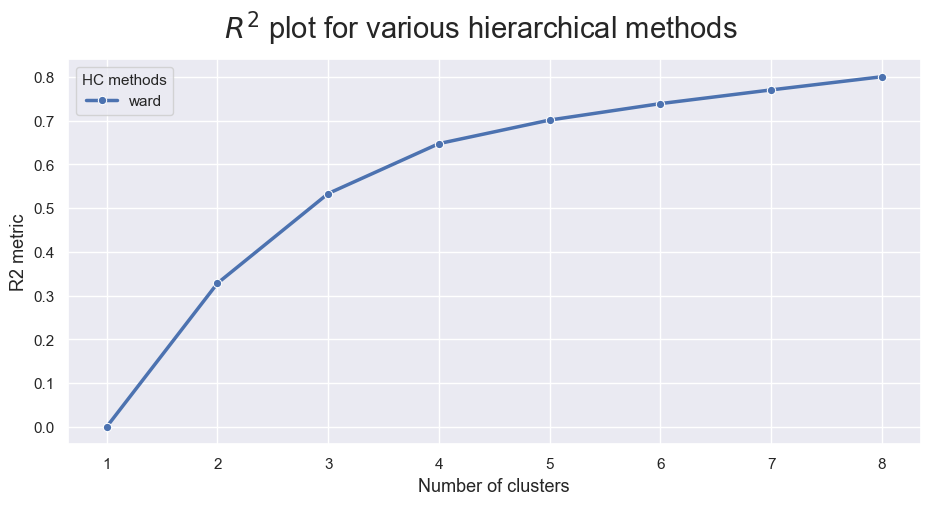

In [36]:
# plot the R2 for multiple cluster numbers
sns.set()

fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, marker="o")

plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

fig.suptitle("$R^2$ plot for various hierarchical methods", fontsize=21)

plt.show()

**Conclusion:** Following this plot, the best number of clusters seems to be 4 or 5

#### Dendogram:

In [61]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'


hclustDendr = AgglomerativeClustering(linkage=linkage, metric=distance, distance_threshold=0, n_clusters=None)
hclustDendr.fit_predict(df[prefBasedFeatures])

counts = np.zeros(hclustDendr.children_.shape[0])
n_samples = len(hclustDendr.labels_)


for i, merge in enumerate(hclustDendr.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count


linkage_matrix = np.column_stack(
    [hclustDendr.children_, hclustDendr.distances_, counts]
).astype(float)



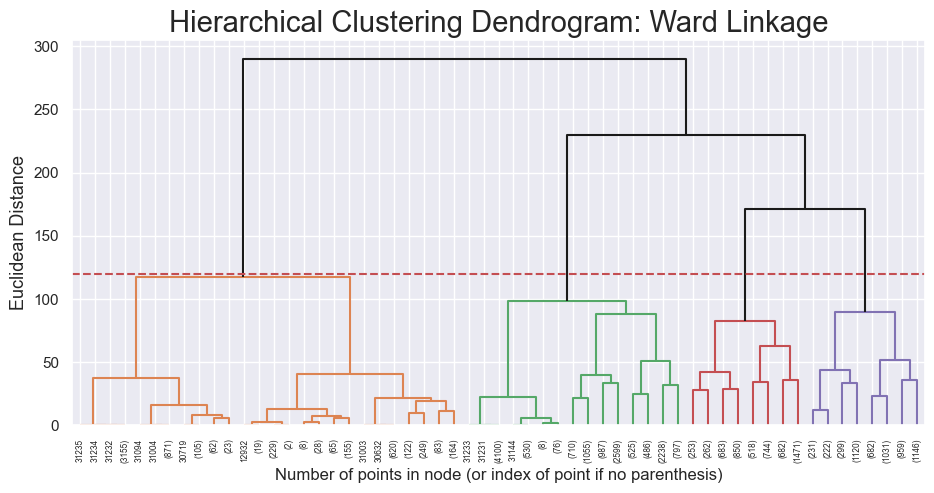

In [82]:
# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
y_threshold = 120
dendrogram(linkage_matrix, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering Dendrogram: {linkage.title()} Linkage', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

**Conclusion:** the dendrogram confirms our assumption that the best number is either 4 or 5. It is a close call and both could be valid answers. 

Purchase/Behavior based Features:

In [37]:
##########################################
# THIS TAKES A FEW MINUTES TO RUN!!
##########################################

max_nclus = 8

r2_hc = get_r2_hc(df[purchaseBasedFeatures], 
                              link_method="ward", 
                              max_nclus=max_nclus, 
                              min_nclus=1, 
                              dist="euclidean") 
                              

In [38]:
r2_hc_methods = pd.DataFrame(r2_hc, index=range(1, max_nclus + 1), columns=["ward"])

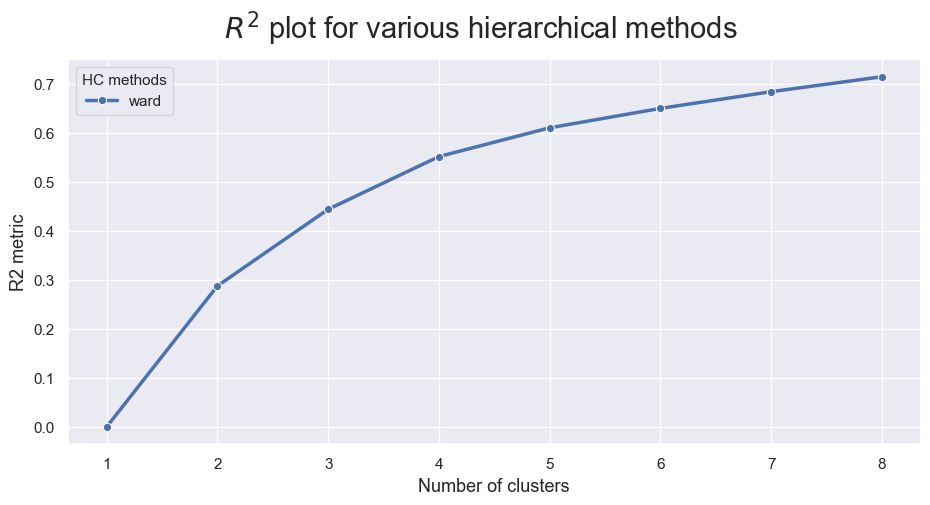

In [39]:
# plot the R2 for multiple cluster numbers
sns.set()

fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, marker="o")

plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

fig.suptitle("$R^2$ plot for various hierarchical methods", fontsize=21)

plt.show()

**Conclusion:** The best number of features again seems to be either 4 or 5

In [63]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'


hclustDendr2 = AgglomerativeClustering(linkage=linkage, metric=distance, distance_threshold=0, n_clusters=None)
hclustDendr2.fit_predict(df[purchaseBasedFeatures])

counts = np.zeros(hclustDendr2.children_.shape[0])
n_samples = len(hclustDendr2.labels_)

for i, merge in enumerate(hclustDendr2.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix2 = np.column_stack(
    [hclustDendr2.children_, hclustDendr2.distances_, counts]
).astype(float)



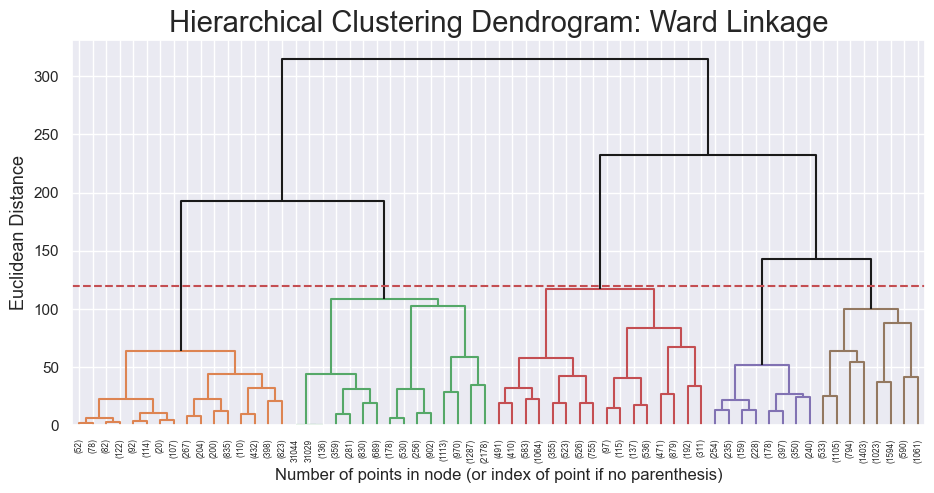

In [78]:
# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
y_threshold = 120
dendrogram(linkage_matrix2, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering Dendrogram: {linkage.title()} Linkage', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

**Conclusion:** the dendrogram delivers 5 as the best number. 4 clusters only would lead to a big generalization of some features that could easily be seperated. Even a higher number of clusters could be possible here.

Age/Time based features:

In [40]:
##########################################
# THIS TAKES A FEW MINUTES TO RUN!!
##########################################

max_nclus = 8

r2_hc = get_r2_hc(df[ageTimeBasedFeatures], 
                              link_method="ward", 
                              max_nclus=max_nclus, 
                              min_nclus=1, 
                              dist="euclidean") 
                              

In [41]:
r2_hc_methods = pd.DataFrame(r2_hc, index=range(1, max_nclus + 1), columns=["ward"])

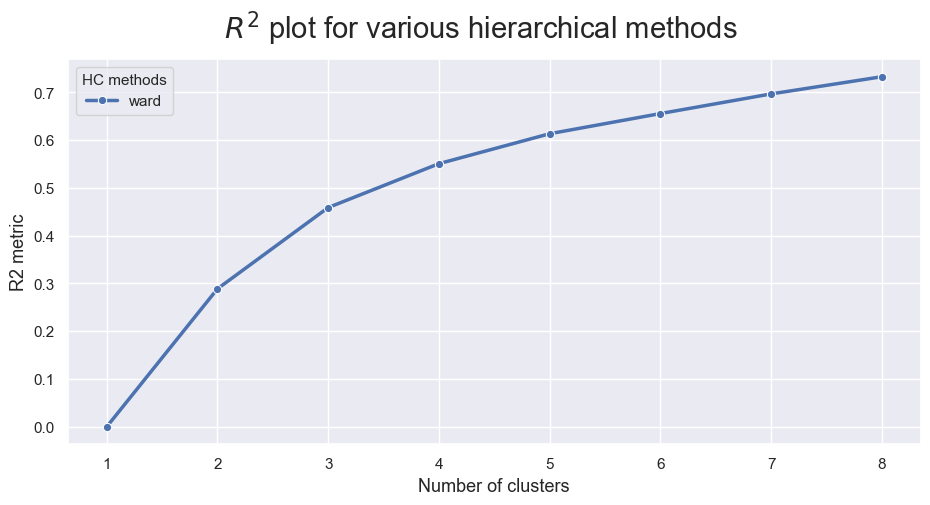

In [42]:
# plot the R2 for multiple cluster numbers
sns.set()

fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, marker="o")

plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("R2 metric", fontsize=13)

fig.suptitle("$R^2$ plot for various hierarchical methods", fontsize=21)

plt.show()

**Conclusion:** again the best number of clusters seems to be between 4 and 5

In [65]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'ward'
distance = 'euclidean'


hclustDendr3 = AgglomerativeClustering(linkage=linkage, metric=distance, distance_threshold=0, n_clusters=None)
hclustDendr3.fit_predict(df[ageTimeBasedFeatures])

counts = np.zeros(hclustDendr3.children_.shape[0])
n_samples = len(hclustDendr3.labels_)

for i, merge in enumerate(hclustDendr3.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrix3 = np.column_stack(
    [hclustDendr3.children_, hclustDendr3.distances_, counts]
).astype(float)



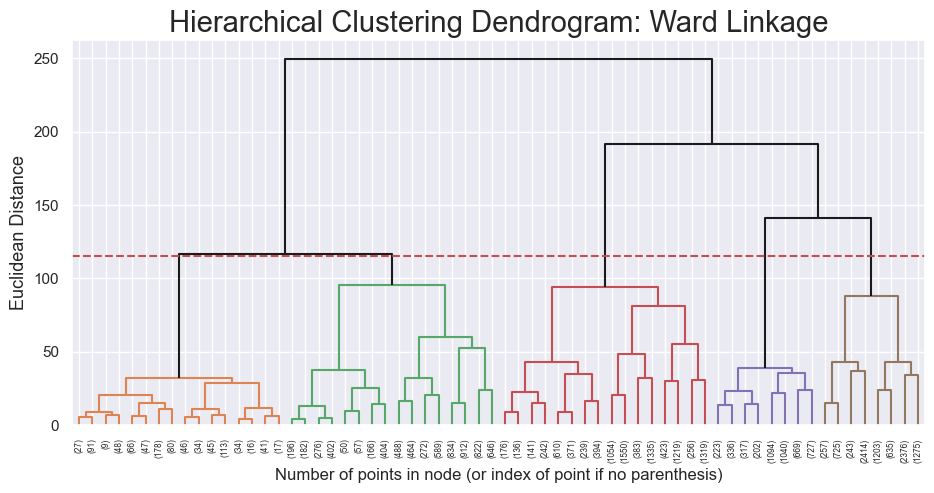

In [75]:
# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
y_threshold = 115
dendrogram(linkage_matrix3, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering Dendrogram: {linkage.title()} Linkage', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

**Conclusion:** the dendrogram clearly delivers 5 as the best number, since using 4 would lead to 2 quite different groups (green and orange) beeing connected to one cluster.

3. decision for best number of clusters


Goal: final decision for best number of clusters

**Final Conclusion:** Finally, we decide that 5 is the best number of clusters for all. For most groups 4 also looked like a good number, but all groups should have the same number of clusters for future calculations and we again prefer a more seperated and less generalized clustering.

<a class="anchor" id="seven-bullet"></a>
## <span style="color:salmon"> 7. Final Clustering </span> 
<a href="#top">Top &#129033;</a>

1. final clustering for each perspective


Goal: conduct final clustering for each perspective

In [83]:
clustPerspective_1_5 = AgglomerativeClustering(linkage='ward', metric='euclidean', n_clusters=5)
cp_1_5_labels5 = clustPerspective_1_5.fit_predict(df[prefBasedFeatures])
cp_1_5_labels5

array([0, 0, 3, ..., 0, 4, 4], dtype=int64)

In [ ]:
np.savetxt("labels_1_5.csv", cp_1_5_labels5, delimiter=",", fmt='%d') # again saving the labels for later use in the interface

In [86]:
# add labels to dataset
labels_series = pd.Series(cp_1_5_labels5, name='labels1', index=df.index)

df_concat_1_5 = pd.concat([df[prefBasedFeatures], labels_series],axis=1)
df_concat_1_5[prefBasedFeatures+['labels1']].groupby('labels1').mean()

,culinary_variety,loyalty_to_venders,chain_preference,is_chain
labels1,,,,
0,-0.279701,0.633133,0.437311,-0.530408
1,1.605164,-0.243013,0.426639,0.996306
2,-0.627112,-1.712178,-1.721691,-1.914641
3,-0.225275,-1.340075,0.306973,0.163467
4,-0.677271,0.653415,-1.721691,-1.914641


In [87]:
clustPerspective_2_5 = AgglomerativeClustering(linkage='ward', metric='euclidean', n_clusters=5)
cp_2_5_labels5 = clustPerspective_2_5.fit_predict(df[purchaseBasedFeatures])
cp_2_5_labels5

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [88]:
np.savetxt("labels_2_5.csv", cp_2_5_labels5, delimiter=",", fmt='%d') # again saving the labels for later use in the interface

In [90]:
# add labels to dataset
labels_series = pd.Series(cp_2_5_labels5, name='labels2', index=df.index)

df_concat_2_5 = pd.concat([df[purchaseBasedFeatures], labels_series],axis=1)
df_concat_2_5[purchaseBasedFeatures+['labels2']].groupby('labels2').mean()

,vendor_count,product_count,total_expenses,avg_per_product,avg_per_order,avg_order_size
labels2,,,,,,
0,-0.328174,0.439035,0.492345,0.743482,1.095013,1.209002
1,-0.509129,-0.389784,-0.533168,0.452012,0.044549,-0.794902
2,0.547844,1.283561,0.356445,-0.670098,-0.514782,0.096896
3,-0.235789,-0.047860,-1.281233,-1.434042,-1.481584,-0.802066
4,1.101618,2.099378,1.796543,0.563194,0.694664,0.534081


In [91]:
clustPerspective_3_5 = AgglomerativeClustering(linkage='ward', metric='euclidean', n_clusters=5)
cp_3_5_labels5 = clustPerspective_3_5.fit_predict(df[ageTimeBasedFeatures])
cp_3_5_labels5

array([4, 4, 4, ..., 4, 4, 4], dtype=int64)

In [92]:
np.savetxt("labels_3_5.csv", cp_3_5_labels5, delimiter=",", fmt='%d') # again saving the labels for later use in the interface

In [94]:
# add labels to dataset
labels_series = pd.Series(cp_3_5_labels5, name='labels3', index=df.index)

df_concat_3_5 = pd.concat([df[ageTimeBasedFeatures], labels_series],axis=1)
df_concat_3_5[ageTimeBasedFeatures+['labels3']].groupby('labels3').mean()

,first_order,last_order,lifetime_days,customer_age_group
labels3,,,,
0,0.295224,0.298548,-1.610106,-0.020902
1,0.020526,0.698781,0.333282,-0.631787
2,-1.713720,0.627599,0.770626,0.051917
3,0.018229,0.693638,0.343202,1.169393
4,-1.820480,-1.726493,-1.489331,0.009434


We create a dataframe joining all columns with the labels for each persepective

In [95]:
combined_df = pd.concat([df_concat_1_5, df_concat_2_5, df_concat_3_5], axis=1)

In [96]:
combined_df.head(3)

,culinary_variety,loyalty_to_venders,chain_preference,is_chain,labels1,vendor_count,product_count,total_expenses,avg_per_product,avg_per_order,avg_order_size,labels2,first_order,last_order,lifetime_days,customer_age_group,labels3
0,-0.910966,0.669419,-0.186732,-0.875898,0,-0.268272,0.770472,0.219535,-0.247962,0.836736,2.839373,0,-3.190912,-2.554213,-1.221305,-1.313846,4
1,-0.132847,0.669419,0.902339,-0.268272,0,-0.268272,-0.268272,-0.216113,0.668754,0.216075,-0.802304,1,-3.190912,-2.554213,-1.221305,-3.018849,4
2,-0.910966,-1.505379,0.902339,-0.268272,3,-0.875898,-0.268272,-0.977961,-0.638071,-0.839011,-0.802304,1,-3.190912,-2.554213,-1.221305,1.600876,4


In [97]:
features = combined_df[['labels1', 'labels2', 'labels3']].values

2. adding weights


Goal: add weights for each perspective in order to decide on their impact for final clustering

We add different weights to the perspectives in order to control their influence on the final clustering. Specifically, we decide to give 50% more influence for the first two groups, because the features from the third group (first_order, last_order, lifetimedays and customer_age) should not have an equally big impact on the clustering, we prefer to focus on customer preferences and behavior.

In [98]:
weights = [1.5, 1.5, 1.0]
features_weighted = features * weights

In [99]:
features_weighted

array([[0. , 0. , 4. ],
       [0. , 1.5, 4. ],
       [4.5, 1.5, 4. ],
       ...,
       [0. , 1.5, 4. ],
       [6. , 1.5, 4. ],
       [6. , 1.5, 4. ]])

3. distance matrix


Goal: calculate a distance matrix with distances between all rows based on their clustering labels from perspective clustering

we calculate a matrix consisting of the euclidean distances between the cluster labels of the perspective groups. Based on this we will conduct the final clustering, joining the three perspectives into one clustering 

In [39]:
euclidean_distances = pdist(features_weighted, metric='euclidean')
distance_matrix = squareform(euclidean_distances)

4. best number of clusters


Goal: get best number of clusters for final clustering

To check for the best number of clusters, we need a slightly different approach. since we already have distances calculated and use a distance matrix instead of features, we can not use the r2 score. we use the silhouette score instead in order to avaluate the best possible number of clusters.

In [8]:
def get_r2_hc_from_dist(dist_matrix, link_method, max_nclus, min_nclus=2):

    r2 = []
    for i in range(min_nclus, max_nclus + 1):
        cluster = AgglomerativeClustering(
            n_clusters=i, 
            metric='precomputed', 
            linkage=link_method
        )
        hclabels = cluster.fit_predict(dist_matrix)
        
        score = silhouette_score(dist_matrix, hclabels, metric="precomputed")
        r2.append(score)
    
    return np.array(r2)


Also the linking method ward is not available for already calculated distances. So we decided to use the 'average' linking method instead, this delivered the best results.

In [ ]:
max_nclus = 6
r2_hc = get_r2_hc_from_dist(
    distance_matrix, 
    link_method="average",
    max_nclus=max_nclus, 
    min_nclus=2
)

In [16]:
r2_hc_methods = pd.DataFrame(r2_hc, index=range(2, max_nclus + 1), columns=["ward"])

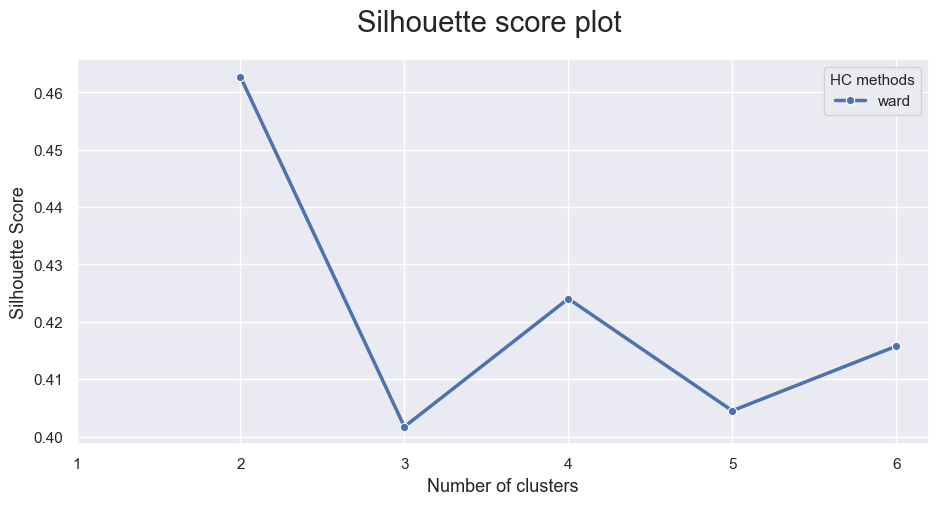

In [23]:
# plot the R2 for multiple cluster numbers
sns.set()

fig = plt.figure(figsize=(11,5))
sns.lineplot(data=r2_hc_methods, linewidth=2.5, marker="o")

plt.legend(title="HC methods", title_fontsize=11)
plt.xticks(range(1, max_nclus + 1))
plt.xlabel("Number of clusters", fontsize=13)
plt.ylabel("Silhouette Score", fontsize=13)

fig.suptitle("Silhouette score plot", fontsize=21)

plt.show()

**Conclusion:** the best number of clusters seems to be 4 or 6 (since 2 would be too unspecific)

#### We also use a dendrogram for a final decision

In [ ]:
# setting distance_threshold=0 and n_clusters=None ensures we compute the full tree
linkage = 'average'
distance = 'euclidean'


hclustDendrF = AgglomerativeClustering(linkage=linkage, metric='precomputed', distance_threshold=0, n_clusters=None)
hclustDendrF.fit_predict(distance_matrix)

counts = np.zeros(hclustDendrF.children_.shape[0])
n_samples = len(hclustDendrF.labels_)

for i, merge in enumerate(hclustDendrF.children_):
    current_count = 0
    for child_idx in merge:
        if child_idx < n_samples:
            current_count += 1
        else:
            current_count += counts[child_idx - n_samples]
    counts[i] = current_count

linkage_matrixF = np.column_stack(
    [hclustDendrF.children_, hclustDendrF.distances_, counts]
).astype(float)



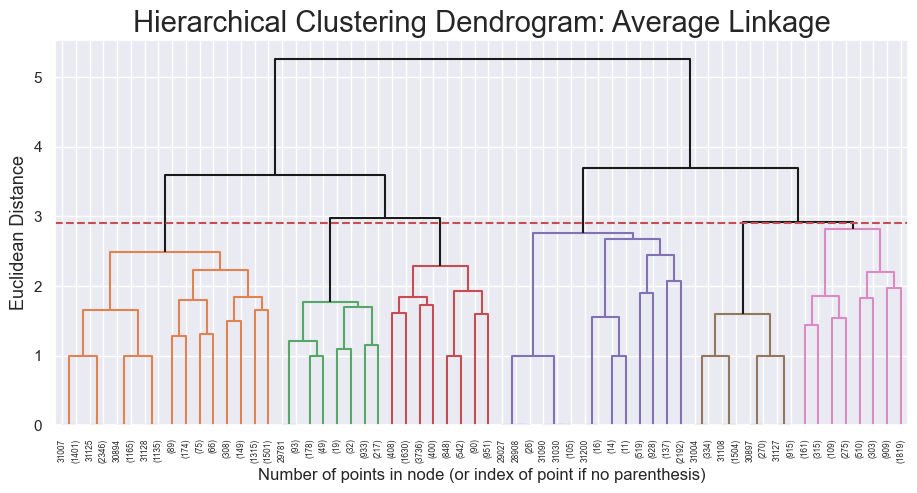

In [37]:
# Plot the corresponding dendrogram
sns.set()
fig = plt.figure(figsize=(11,5))
y_threshold = 2.9
dendrogram(linkage_matrixF, truncate_mode='level', p=5, color_threshold=y_threshold, above_threshold_color='k')
plt.hlines(y_threshold, 0, 1000, colors="r", linestyles="dashed")
plt.title(f'Hierarchical Clustering Dendrogram: {linkage.title()} Linkage', fontsize=21)
plt.xlabel('Number of points in node (or index of point if no parenthesis)')
plt.ylabel(f'{distance.title()} Distance', fontsize=13)
plt.show()

**Conclusion:** decision: 5 or 6 seems reasonable in order to avoid over-specialization but also in order to have a fairly big number of clusters to reasonably seperate our customers and apply specifc business approaches for all groups. We decide for 6 as the best number of clusters

5. final clustering


Goal: conduct final clustering

In [50]:
hclust_meta = AgglomerativeClustering(
    linkage='average',
    metric='precomputed', 
    n_clusters=6             
)

meta_labels = hclust_meta.fit_predict(distance_matrix)

In [51]:
labels_series = pd.Series(meta_labels, name='metalabels', index=df.index)

df_concat_meta_W = pd.concat([df[metric_features], labels_series],axis=1)
df_concat_meta_W[metric_features+['metalabels']].groupby('metalabels').mean()


print("Meta cluster labels:", meta_labels)


Meta-Cluster-Zuordnungen: [1 1 0 ... 1 0 0]


In [42]:
np.savetxt("meta_labels_Final6.csv", meta_labels, delimiter=",", fmt='%d')

6. analyse final clusters


Goal: analyse and evaluate results of final clusters

 We can see the Cluster sizes and Average values in order to label our clusters/customer groups.

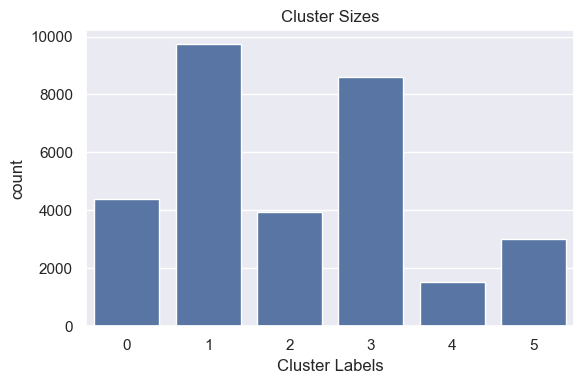

In [52]:
fig, ax = plt.subplots(figsize=(6,4))
sns.countplot(data=df_concat_meta_W, x='metalabels')
ax.set_title("Cluster Sizes")
ax.set_xlabel("Cluster Labels")
fig.tight_layout()
plt.show()

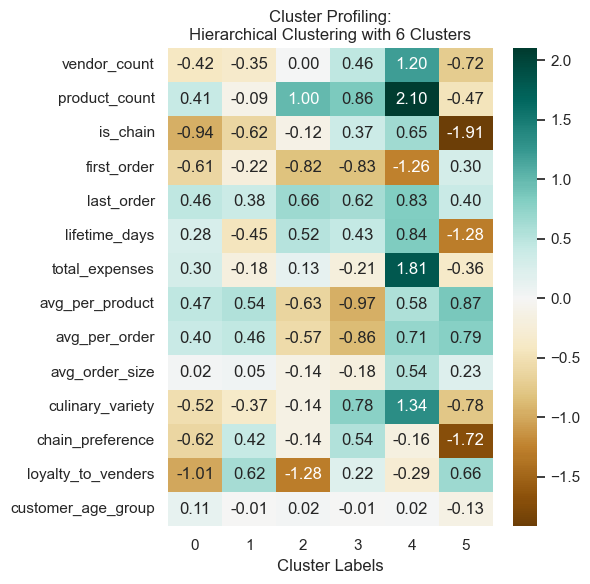

In [53]:
fig, ax = plt.subplots(figsize=(6, 6))
hc_profile = df_concat_meta_W.groupby('metalabels').mean().T
sns.heatmap(hc_profile,center=0, annot=True, cmap="BrBG", fmt=".2f",ax=ax)
ax.set_xlabel("Cluster Labels")
ax.set_title("Cluster Profiling:\nHierarchical Clustering with 6 Clusters")
fig.tight_layout()
plt.show()

The cluster **4** is the smallest, whilst the clusters **1** and **3** have the most customers. The clusters **0**, **2** and **5** have similar number of customers.

Following the average values for each feature and cluster, we can label the customergroups in the following way:

Cluster **4** are our **best customers**. They have very high numbers of vendor-/productcount, also have very high total expenses and also high averages per product, per order and also high average order sizes. The big average in lifetimedays shows that they used ABCDeats for a long time or still use it. Due to the low average value of first_order we can conclude that they mostly made their first order a long time ago.

The cluster **5** represents the **least spending customers**. They have low values for vendor-/productcount, low values for total_expenses and lifetimedays. Their average spendings per order are quite high which leads to the conclusion that they simply did not make a lot of orders. Interesting for business aproaches are the very low values for chain preference and is_chain, meaning that tbese customers avoided ordering from chains. 

The cluster **1** represents the **regular customers** with the most average values in most features, they are also the biggest group of customers. They tend to be quite loyal to certain vendors as seen in the value of loyalty_to_vendors and lower value for vendor_count. 

The cluster **0** can be seen as a smaller subgroup of the cluster 1, having low average values for loyality and and chain preference. They also have higher values for lifetimedays and higher total expenses, actually the second highest total expenses just behind the customers from cluster 4. So cluster 0 seems to contain the **regular customers who tend to spend more**. 

The cluster **3** shows high values for vendor-/productcount but very low values for the averages per order and per product, meaning that these customers make **a lot of orders, but rather small ones**. They have a reasonably high value for lifetimedays meaning that they use ABCDeats for good amout of time.

Finally the cluster **2** can be seen as a **subgroup from cluster 3**. Main differences are the **lower values in loyality to vendors and also chain preference**. These customers also make a lot of smaller orders rather than less big ones, but they tend to not have favourite places but order from different vendors.  

<a class="anchor" id="eight-bullet"></a>
## <span style="color:salmon"> 8. Marketing approaches </span> 
<a href="#top">Top &#129033;</a>

Cluster **0**: regular but more spending customers:
These customers spend more than average regular users and have higher total expenses. We belive a focus on encouraging continued engagement would be useful in order to help them becoming closer to the best spending customers. A main idea is the offering of premium loyalty rewards, such as free delivery for reaching specific spending thresholds. Also encouraging higher basket sizes by promoting exclusive combos or upsized orders would be a good approach.

Cluster **1**: largest group of regular customers:
Regular customers represent the core user base with average spending habits and strong loyalty to specific vendors. We recommend to focus on reinforcing their attachment by introducing loyalty programs tied to their favorite vendors, offering exclusive discounts or benefits, since they have reasonably high loyality to certain vendors. Also encouraging repeat orders by recommending familiar items or combinations they are likely to prefer might help to make them more valuable.

Cluster **2**: frequent orders but low loyality:
We recommend to focus on their variety-seeking behavior by highlighting new or diverse dining options. Personalized dynamic offers can also incentivize them to return to a specific vendor, gradually building loyalty.

Cluster **3**: High frequency, small orders:
We recommend to encourage larger orders by introducing value bundles or promotional discounts for multi-item purchases. Gamified loyalty programs, such as rewards for hitting a specific number of orders in a month, can also keep them engaged while promoting more consistent activity.

Cluster **4**: best spending customers:
These customers have high spending, loyalty, and long-term engagement. It is important to keep these customers satisfied. Premium experiences like VIP memberships with perks such as free delivery, priority service, or early access to exclusive menus could reward them for they high spending habits. Also strengthening their loyalty with unique rewards or experiences, such as exclusive restaurant partnerships or invitations to food-related events could make them feel valued.

Cluster **5**: least spending customers:
Simple instruments like discounts and coupons could encourage them to increase their spending habits. After regaining these customers, their behavior can be observed and they can be put in one of above groups in order to focus on their satisfaction and habits.

## Further Insights for all clusterings can be found in the useractive Interface